In [95]:
import numpy as np
import pandas as pd
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
df = pd.read_csv("D:\Data science\Final project\Drug data set\drugsComTrain_raw.csv")
new = pd.read_csv("D:\Data science\Final project\Drug data set\drugsComTest_raw.csv")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [97]:
# as both the dataset contains same columns we can combine them for better analysis

df1 = pd.concat([df, new])
df1.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [98]:
df1.shape

(215063, 7)

In [99]:
df1.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [100]:
df1.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [101]:
df1['review'].unique()

array(['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
       '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."',
       '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But 

In [102]:
#We are going to train only on text to classify its sentiment. So we can ditch the rest of the useless columns.
df1 = df1.drop(['uniqueID', 'drugName', 'condition', 'date' , 'usefulCount'], axis=1)

In [103]:
df1.head()

,review,rating
0,"""It has no side effect, I take it in combinati...",9
1,"""My son is halfway through his fourth week of ...",8
2,"""I used to take another oral contraceptive, wh...",5
3,"""This is my first time using any form of birth...",8
4,"""Suboxone has completely turned my life around...",9


In [105]:
conditions = [
    (df1['rating'] <= 4),
    (df1['rating'] >= 6) ,
    (df1['rating'] == 5)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Positive','Netrual']



# create a new column and use np.select to assign values to it using our lists as arguments
df1['sentiment'] = np.select(conditions, values)

# display updated DataFrame
df1.head(30)

,review,rating,sentiment
0,"""It has no side effect, I take it in combinati...",9,Positive
1,"""My son is halfway through his fourth week of ...",8,Positive
2,"""I used to take another oral contraceptive, wh...",5,Netrual
3,"""This is my first time using any form of birth...",8,Positive
4,"""Suboxone has completely turned my life around...",9,Positive
5,"""2nd day on 5mg started to work with rock hard...",2,Negative
6,"""He pulled out, but he cummed a bit in me. I t...",1,Negative
7,"""Abilify changed my life. There is hope. I was...",10,Positive
8,""" I Ve had nothing but problems with the Kepp...",1,Negative
9,"""I had been on the pill for many years. When m...",8,Positive


Text(0.5, 1.0, 'Sentiment Data Distribution')

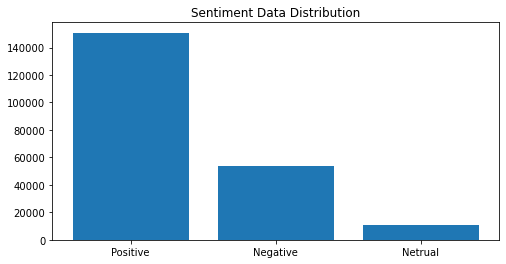

In [106]:
val_count = df1.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [107]:
df1 = df1.drop(['rating'],axis=1)
df1.head()

,review,sentiment
0,"""It has no side effect, I take it in combinati...",Positive
1,"""My son is halfway through his fourth week of ...",Positive
2,"""I used to take another oral contraceptive, wh...",Netrual
3,"""This is my first time using any form of birth...",Positive
4,"""Suboxone has completely turned my life around...",Positive


In [108]:
from nltk.stem import SnowballStemmer
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')


In [109]:
def preprocess(review, stem=False):
    tokens = []
    for token in review.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
                return " ".join(tokens)

In [110]:
df1.head()

,review,sentiment
0,"""It has no side effect, I take it in combinati...",Positive
1,"""My son is halfway through his fourth week of ...",Positive
2,"""I used to take another oral contraceptive, wh...",Netrual
3,"""This is my first time using any form of birth...",Positive
4,"""Suboxone has completely turned my life around...",Positive


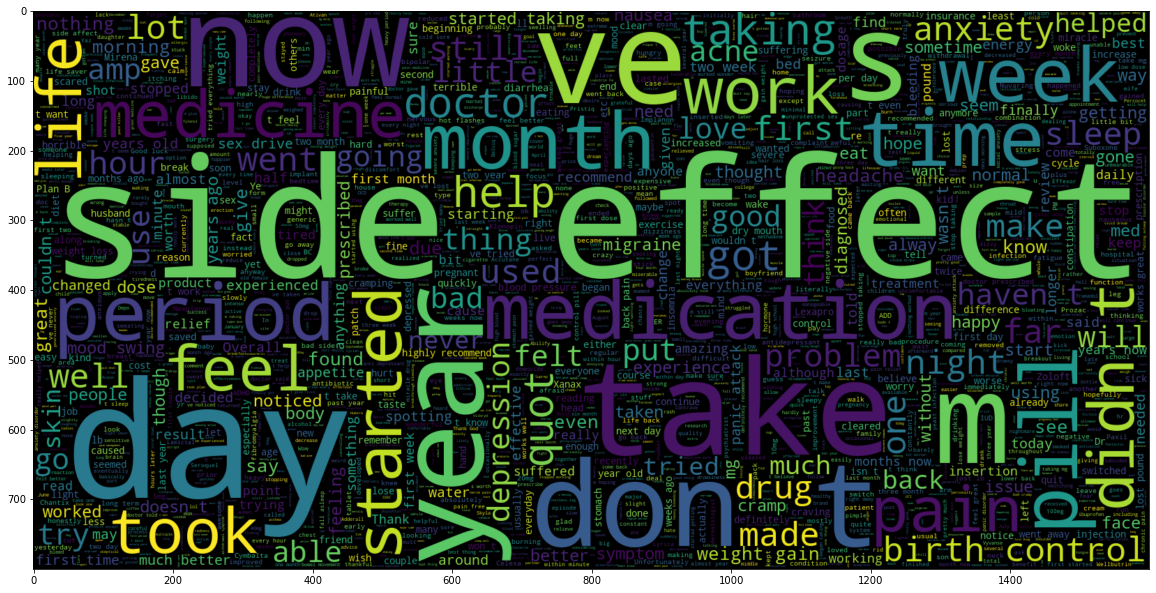

In [111]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df1[df1.sentiment == 'Positive'].review))
plt.imshow(wc , interpolation = 'bilinear')

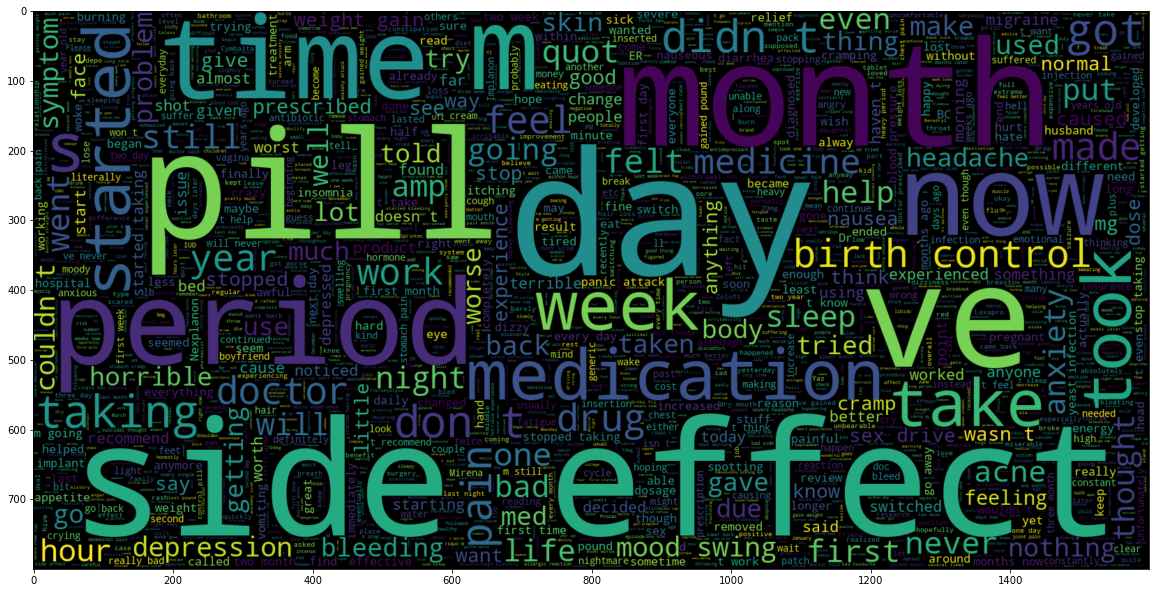

In [112]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df1[df1.sentiment == 'Negative'].review))
plt.imshow(wc , interpolation = 'bilinear')

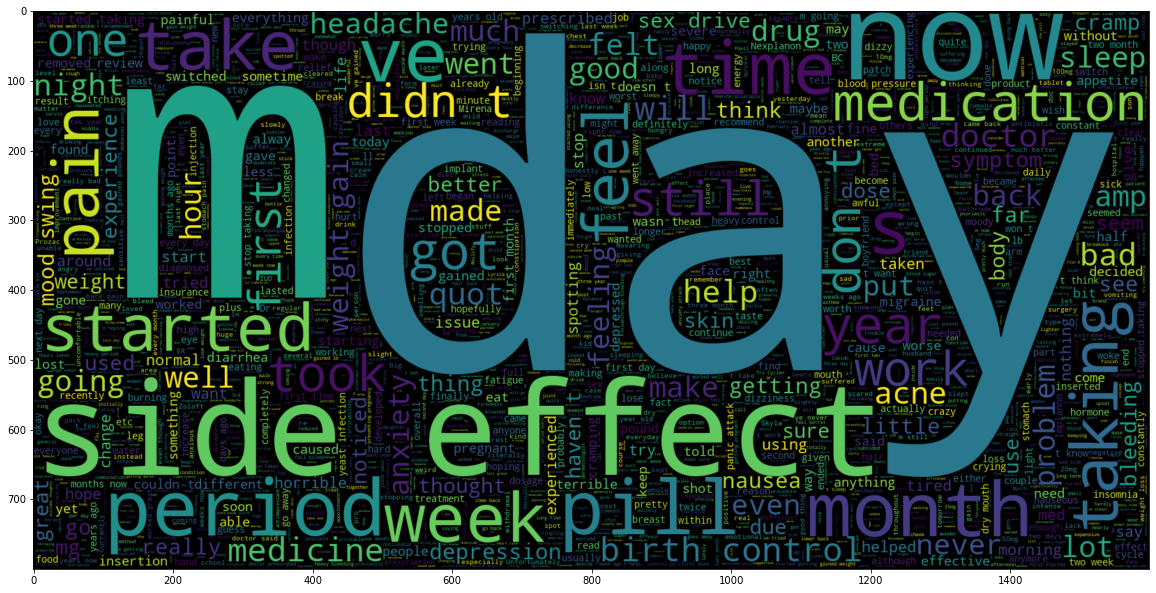

In [113]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df1[df1.sentiment == 'Netrual'].review))
plt.imshow(wc , interpolation = 'bilinear')

In [114]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [115]:
train_data, test_data = train_test_split(df1, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 172050
Test Data size 43013


In [116]:
#train_test_split will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.
train_data.head(10)

,review,sentiment
1156,"""I was getting food stuck n my throat ended up...",Positive
75562,"""I have now been using Dupixent for about a mo...",Positive
19751,"""I started this birth control to help with my ...",Negative
25734,"""Not impressed. I was on Embeda, but found it ...",Negative
1531,"""I have been taking 50mg of Zoloft for a month...",Positive
25499,"""Works quickly and I sleep well. Fast acting. ...",Positive
90537,"""I began talking this pill 4 months ago to hel...",Positive
16756,"""I have been using this product since it was m...",Positive
146159,"""I went from ibs to ibs c and suffered severe ...",Positive
59457,"""Chantix is a miracle. It&#039;s the best thin...",Positive


In [117]:
#Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.review)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 52427


In [118]:
#Now we got a tokenizer object, which can be used to covert any word into a Key in dictionary (number).
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.review),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.review),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (172050, 30)
Testing X Shape: (43013, 30)


In [119]:
labels = train_data.sentiment.unique().tolist()

In [120]:
#We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (172050, 1)
y_test shape: (43013, 1)


In [26]:
#In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it.

#Word Embedding is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

#Basically, it's a feature vector representation of words which are used for other natural language processing applications.

#We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use Transfer Learning. We download the pre-trained embedding and use it in our model.

#The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.

#In this notebook, I use GloVe Embedding from Stanford AI which can be found here

In [121]:
GLOVE_EMB = 'D:\\anaconda\\glove\\glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 4

In [122]:
embeddings_index = {}

f = open(GLOVE_EMB,encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [123]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [124]:
import tensorflow as tf

In [125]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [126]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [127]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [128]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [35]:
#Callbacks
#Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

#LRScheduler - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

#ModelCheckPoint - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [129]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [130]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/4
169/169 [==============================] - 673s 4s/step - loss: -37501.7617 - accuracy: 0.0501 - val_loss: -171951.6406 - val_accuracy: 0.0510
Epoch 2/4
169/169 [==============================] - 595s 4s/step - loss: -774366.3750 - accuracy: 0.0496 - val_loss: -1764757.2500 - val_accuracy: 0.0510
Epoch 3/4
169/169 [==============================] - 591s 3s/step - loss: -3766963.2500 - accuracy: 0.0496 - val_loss: -6382273.0000 - val_accuracy: 0.0510
Epoch 4/4
169/169 [==============================] - 589s 3s/step - loss: -10524804.0000 - accuracy: 0.0496 - val_loss: -15440744.0000 - val_accuracy: 0.0510


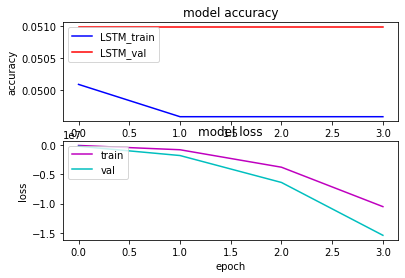

In [131]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [132]:
#The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as POSITIVE sentiment.
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

5/5 [==============================] - 81s 6s/step


In [133]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

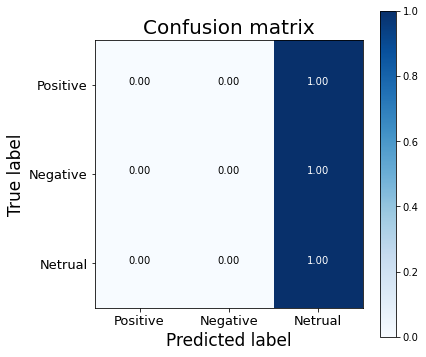

In [134]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [135]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     10765
     Netrual       0.00      0.00      0.00      2193
    Positive       0.70      1.00      0.82     30055

    accuracy                           0.70     43013
   macro avg       0.23      0.33      0.27     43013
weighted avg       0.49      0.70      0.57     43013



D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
